In [10]:
#필요 모듈 호출
import numpy as np #행렬 연산 패키지
from scipy import stats #과학 계산 패키지
import scipy.stats #통계 분석 패키지
import pandas as pd #데이터 패키지
import statsmodels.api as sm #통계 분석 패키지
import matplotlib.pyplot as plt #데이터 시각화 패키지
import seaborn as sns #데이터 시각화 패키지
from statsmodels.stats.proportion import proportions_ztest
import matplotlib


#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

AttributeError: type object 'pandas._libs.tslibs.conversion._TSObject' has no attribute '__reduce_cython__'

In [5]:
ds_camshaft = pd.read_csv("/home/pirl/Downloads/camshaft.csv", engine = "python")
ds_camshaft.head()

data1 = ds_camshaft['Supp1']
shapiro(data1)

NameError: name 'pd' is not defined

In [32]:
#p.105 [실습] 정규성 검정
ds_camshaft = pd.read_csv("/home/pirl/Downloads/2sample_t_test.csv", engine = "python") #csv 파일 호출
ds_camshaft.head() #파일 정상 출력 확인

data1 = ds_camshaft['Mat_A']
data2 = ds_camshaft['Mat_B']
print(shapiro(data1))
print(shapiro(data2))
#두 가지 경우 전부 p값이 0.5이상이 나왔다.
#두 가지 경우 모두 정규분포를 따른다는 것을 알 수 있다.

(nan, 1.0)
(nan, 1.0)


In [37]:
#p.26
ds_Exh_QC1 = pd.read_csv("/home/pirl/Downloads/EXH_QC1.csv", engine = "python")
df = ds_Exh_QC1[['Flaws','Period']]

count = df['Flaws'].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

print(cumcnt, percent, cumpct)

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64 Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64 Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64


In [44]:
#p.24
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python")
df = ds_mycars[['model','mpg']]
df.head

<bound method NDFrame.head of       model  mpg
0        a4   18
1        a4   21
2        a4   20
3        a4   21
4        a4   16
..      ...  ...
229  passat   19
230  passat   21
231  passat   16
232  passat   18
233  passat   17

[234 rows x 2 columns]>

In [49]:
#p.107
df = pd.DataFrame({"sample":[3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=0.397/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([2.57],[2.82])


In [51]:
#p.108 [실습] 모평균 구간추정_모표준편차를 아는 경우
df = pd.DataFrame({"sample":[18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
#데이터를 직접 df에 넣는다.
df.head()
#입력한 데이터의 헤드부분을 출력하여 정상 출력되는지 확인한다.
lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
#95%의 신뢰수준, 평균값, 3.8의 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 17.83에서 21.17 사이이다.
#모표준편차가 주어져서 따로 계산할 필요가 없어서 과제 수행이 용이했다.

신뢰구간: ([17.83],[21.17])


In [53]:
#p110
df = pd.DataFrame({"sample":[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))



신뢰구간:([54.39],[55.33])


In [57]:
#p111 [실습] 모평균 추정_모표준편차를 모르는 경우
df = pd.DataFrame({"sample":[73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
#데이터를 직접 df에 넣는다.
lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
#95%의 신뢰수준, n-1, 평균, 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 70.6에서 72.4 사이이다.
#모표준편차가 주어지지 않아서 모표준편차를 따로 계산할 필요가 있어서 과제 수행이 보다 복잡했다.

신뢰구간:([70.6],[72.4])


In [60]:
#p.139
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
t_result = stats.ttest_1samp(df,76.7)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t 통계량: [0.864]
p-value: [0.41]


In [69]:
#p.28 [실습] 기술통계
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python")
df = ds_mycars[['model','mpg']]

count = df['model'].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

print(cumcnt, percent, cumpct)

4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd            199
ram 1500 p

In [114]:
#p.25 [실습] 기술통계 -1
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python")
ds_mycars.head()
df = ds_mycars[['automatic','mpg']] #표의 x축과 기준
df.groupby('automatic').describe().round(3) #표의 y축




mpg                                            
           count    mean    std  min   25%   50%   75%   max
automatic                                                   
auto       157.0  15.968  3.849  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675  4.488  9.0  15.0  18.0  21.0  35.0

In [119]:
#p.25 [실습] 기술통계 -2
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python")
ds_mycars.head()
df = ds_mycars[['highway_mileage','mpg']] #표의 x축과 기준
df.groupby('highway_mileage').describe().round(3) #표의 y축


mpg                                               
                count    mean    std   min    25%   50%    75%   max
highway_mileage                                                     
12                5.0   9.000  0.000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857  0.900  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161  1.186  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800  1.033  12.0  12.00  12.5  13.00  15.0
19               13.0  14.077  0.862  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000  0.894  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000  0.000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857  0.900  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000  1.000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692  0.947  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333  1.676  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000  1.191  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214  1.188  17.0  18.25  19.0  20.00  21.0
28                7.0  19.286  0.756  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636  1.293  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000  1.414  21.0  21.00  21.5  22.50  24.0
31                7.0  21.286  0.951  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000  0.816  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000  2.828  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000    NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000  0.000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500  0.707  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000    NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000    NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000  1.414  33.0  33.50  34.0  34.50  35.0

In [132]:
#p.146
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
plot_data = (df1, df2)

t_result = stats.ttest_ind(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))
#유의 수준 5%에서 검정 결과 P값이 0.003이므로 고객간에 고객 만족도의 차이가 있다.

2-Sample t-test
t:[-3.122]
p:[0.003]


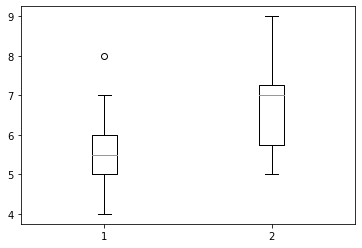

In [93]:
#p.146 그래프
df1 = [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]
df2 = [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]
plot_data = (df1, df2)
ax = plt.boxplot(plot_data)
plt.show()


In [96]:
#p.149
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1,df2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-5.324]
p:[0.]


In [98]:
#p.155
count = 15
n_obs=100
value=0.1

stat,pval = proportions_ztest(count,n_obs,value)

print("1 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

1 Proprotion test
z: 1.400
p:0.161


In [101]:
#p.158
count = np.array([4,1])
nobs = np.array([1000,1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

2 Proprotion test
z: 1.553
p:0.120


In [126]:
#p166
df = pd.DataFrame({'HSG':[270,260,236,234],'SS':[228,285,225,262],'SPA':[227,284,231,208]})
chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-squre test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-squre test
chisq: 11.187
p: 0.083
degree pf freedom: 6
expected value:
[[245.763 281.017 234.576 238.644]
 [245.763 281.017 234.576 238.644]
 [233.475 266.966 222.847 226.712]]


In [129]:
#p168 [실습] 카이제곱 검정
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-squre test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))



chi-squre test
chisq: 98.274
p: 0.000
degree pf freedom: 30


In [1]:
#p.174
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                   'B':[721,821,910,678,723,790,711,790,745,891],
                   'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])


NameError: name 'pd' is not defined